In [7]:
# Step 1: Dataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)

# Normalize (0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0
# Why normalize? → To make training faster & stable by keeping values small.

# Step 2: Model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),   # 784 → input layer
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()   # Prints architecture

# Step 3: Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Why sparse_categorical_crossentropy? → Labels are integers, not one-hot encoded.

# Step 4: Train
print("\nTraining for 4 epochs:")
history_4 = model.fit(x_train, y_train, epochs=4, validation_split=0.1)
print("\nModel learns most patterns well")


print("\nTraining for 10 epochs:")
history_10 = model.fit(x_train, y_train, epochs=10, validation_split=0.1)
print("\nAccuracy may not always improve → model can overfit.")

# Step 5: Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("\nTest accuracy:", test_acc)
# Compare train vs test accuracy → gap means overfitting.

# Step 6: Predict
pred_1 = model.predict(x_test[:1])
print("\nPredicted label (1st image):", pred_1.argmax())
print("Actual label:", y_test[0])

pred_5 = model.predict(x_test[4:5])
print("\nPredicted label (5th image):", pred_5.argmax())
print("Actual label:", y_test[4])

# Step 7: Experiments
# (a) Add Dense(32, ReLU)
model2 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=5, verbose=0)
print("\nExtra Dense(32): Test acc =", model2.evaluate(x_test, y_test, verbose=0)[1])

# (b) Optimizer = SGD
model3 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model3.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=5, verbose=0)
print("SGD Optimizer: Test acc =", model3.evaluate(x_test, y_test, verbose=0)[1])
print("Adam is better than SGD")

# (c): Train for only 1 epoch
print("\nTraining for 1 epoch:")
history_1 = model.fit(x_train, y_train, epochs=1, validation_split=0.1)
print("\nModel just starts learning — underfitting")


# (d) Replace ReLU with Tanh
model4 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='tanh'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(10, activation='softmax')
])
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model4.fit(x_train, y_train, epochs=5, verbose=0)
print("Tanh Activation: Test acc =", model4.evaluate(x_test, y_test, verbose=0)[1])
print("\n Tanh may slightly underperform , not much difference")


Train shape: (60000, 28, 28) (60000,)
Test shape: (10000, 28, 28) (10000,)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Training for 4 epochs:
Epoch 1/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8661 - loss: 0.4436 - val_accuracy: 0.9682 - val_loss: 0.1106
Epoch 2/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9664 - loss: 0.1103 - val_accuracy: 0.9728 - val_loss: 0.0922
Epoch 3/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9767 - loss: 0.0744 - val_accuracy: 0.9758 - val_loss: 0.0877
Epoch 4/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9834 - loss: 0.0542 - val_accuracy: 0.9752 - val_loss: 0.0834

Model learns most patterns well

Training for 10 epochs:
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9860 - loss: 0.0426 - val_accuracy: 0.9750 - val_loss: 0.0863
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9898 - loss: 0.0320 - val_accuracy: 0.9755 - val_loss: 0.0968
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9914 - loss: 0.0268 - val_accuracy: 0.9767 - val_loss: 0.0960
Epoch 4/10


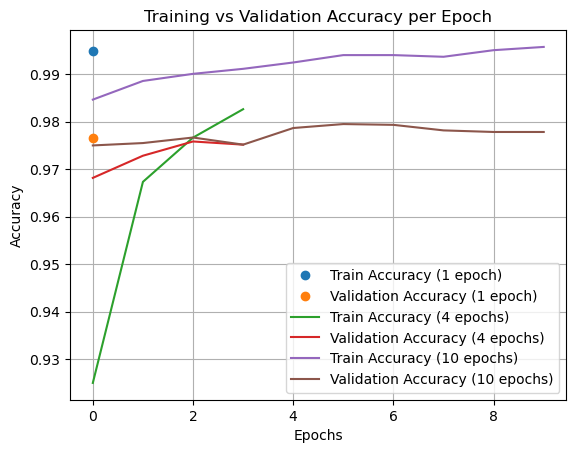

In [10]:
# (e)
import matplotlib.pyplot as plt

# Plot accuracy for 1-epoch training
plt.plot(history_1.history['accuracy'], 'o', label='Train Accuracy (1 epoch)')
plt.plot(history_1.history['val_accuracy'], 'o', label='Validation Accuracy (1 epoch)')

# Plot accuracy for 4-epoch training
plt.plot(history_4.history['accuracy'], label='Train Accuracy (4 epochs)')
plt.plot(history_4.history['val_accuracy'], label='Validation Accuracy (4 epochs)')

# Plot accuracy for 10-epoch training
plt.plot(history_10.history['accuracy'], label='Train Accuracy (10 epochs)')
plt.plot(history_10.history['val_accuracy'], label='Validation Accuracy (10 epochs)')

plt.title("Training vs Validation Accuracy per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
